In [61]:
# Dependencies
import pandas as pd
#import plotly.express as plt
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm

In [62]:
bikecounts_df = pd.read_csv('bikecounts.csv')
bikecounts_df['Day'] = pd.to_datetime(bikecounts_df['Day'])
bikecounts_df.head()

,Unnamed: 0,Date,Day,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
0,0,2016-04-01,2016-04-01,78.1,66.0,0.01,1704.0,3126,4115.0,2552.0,11497
1,1,2016-04-02,2016-04-02,55.0,48.9,0.15,827.0,1646,2565.0,1884.0,6922
2,2,2016-04-03,2016-04-03,39.9,34.0,0.09,526.0,1232,1695.0,1306.0,4759
3,3,2016-04-04,2016-04-04,44.1,33.1,0.47 (S),521.0,1067,1440.0,1307.0,4335
4,4,2016-04-05,2016-04-05,42.1,26.1,0,1416.0,2617,3081.0,2357.0,9471


# Hypothesis

Question: Does high precipitation decrease the amount of bikers crossing the brooklyn bridge in a day?  

   Hypothesis: If precipitation *is* related to the amount of bikers crossing the Brooklyn bridge in a day,
          then higher precipitation would result in an decrease in bikers crossing the brooklyn bridge. 

   Null Hypothesis: If precipitation *is not* related to the amount of bikers crossing the Brooklyn bridge in a day, 
          then higher precipitation *will not* show an decrease in bikers crossing the Brooklyn bridge in a day. 

   Alt. Hypothesis: If precipitation *is* related to the amount of bikers crossing the Brooklyn bridge in a day,
          then higher precipitation *will* show an decrease in bikers crossing the Brooklyn bridge in a day. 


In [63]:
brook_counts = bikecounts_df["Brooklyn Bridge"]
precip = bikecounts_df["Precipitation"]
floatPrecip = []

num = ""

for x in precip:
    try:
        x = float(x)
        floatPrecip.append(x)
    except ValueError:
        listcheck = [char.isdigit() for char in x]
        if True in listcheck:
            for i in range(len(listcheck)):
                if listcheck[i] == True:
                    num += str(x[i])
                if (listcheck[i-1] == True) and (listcheck[i+1] == True):
                    num += str(x[i])
            floatPrecip.append(float(num))
        else:
            x = 0.0
            floatPrecip.append(x)
            continue


In [66]:
# # Select your independent X terms, and your dependent y term. 
y = floatPrecip
X = brook_counts
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.043
Model:                            OLS   Adj. R-squared (uncentered):              0.010
Method:                 Least Squares   F-statistic:                              1.315
Date:                Sat, 16 Oct 2021   Prob (F-statistic):                       0.261
Time:                        16:31:15   Log-Likelihood:                          23.097
No. Observations:                  30   AIC:                                     -44.19
Df Residuals:                      29   BIC:                                     -42.79
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

Text(0.5, 0, 'Brooklyn Bridge Bike Count')

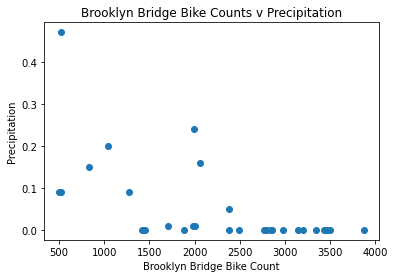

In [65]:
plt.scatter(y = floatPrecip, x = brook_counts)
# Create a title, x label, and y label for our chart
plt.title("Brooklyn Bridge Bike Counts v Precipitation")
plt.ylabel("Precipitation")
plt.xlabel("Brooklyn Bridge Bike Count")

## Analysis

From the regression coefficient there is a very weak positive correlation between precipitation and the number of bikers on the brooklyn bridge. Therefore we would not reject the null hypothesis telling us that high precipitation does not decrease the amount of bikers on the brooklyn bridge. 

From the scatter plot, the lower precipitation levels have higher bike counts. I think if there was more data we would see a negative correlation between precipitation and bike counts however there is no way of telling for sure without more data. 